# Libraries

In [1]:
# plot the graphs inline
%matplotlib inline

In [2]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Introduction

This week we are going to work with some text data. In this folder, you should a text file called 'fullpapers.txt'. This file was generated by converting the proceedings of the EDM (Educational Data Mining) conference of 2018. You can find the proceedings here: http://educationaldatamining.org/EDM2017/proc_files/fullpapers.pdf
We are going to explore the different terms that are used by authors of the papers in this conference, which will require some data cleaning!

# Import the data

Our goal is compare the different papers in terms of the vocabulary used. 
* open the pdf of the proceedings (fullpapers.pdf); 
* open the txt of the proceedigs (fullpapers.txt)

1) we want to split the data into different papers. Brainstorm a few ideas on how to do that:
* Look at Abstract
* Look at Title

In [3]:
# 2) First we are going to read the fullpapers.txt file 
# and assign its content to a variable called "data"
# hint: https://stackoverflow.com/questions/3758147/easiest-way-to-read-write-a-files-content-in-python
data = None
with open('./fullpapers.txt', encoding='utf8') as f:
    data = f.read()


In [4]:
data[:200]

'\x0cZone out no more: Mitigating mind wandering during\ncomputerized reading\nSidney K. D’Mello, Caitlin Mills, Robert Bixler, & Nigel Bosch\nUniversity of Notre Dame\n118 Haggar Hall\nNotre Dame, IN 46556, U'

In [5]:
delimiter = data[:2]
print (delimiter)

Z


In [6]:
# 3) To facilitate data processing, we want to split this file
# into different pages. Create a list called "pages" that 
# stores the text presented on each page of the pdf
# Look into the .split() function, what string are we going to want to split by?
pages = data.split('Proceedings of the 10th International Conference on Educational Data Mining')

In [7]:
pages = data.split(delimiter)

In [8]:
print(pages[0])

In [9]:
# 4) because we don't want to deal with upper case / lower case issues
# we are going to lower case everything:
# Try using a list comprehension to accomplish this task
pages = [x.lower() for x in pages]
print (pages[1])

one out no more: mitigating mind wandering during
computerized reading
sidney k. d’mello, caitlin mills, robert bixler, & nigel bosch
university of notre dame
118 haggar hall
notre dame, in 46556, usa
sdmello@nd.edu

abstract
mind wandering, defined as shifts in attention from task-related
processing to task-unrelated thoughts, is a ubiquitous
phenomenon that has a negative influence on performance and
productivity in many contexts, including learning. we propose
that next-generation learning technologies should have some
mechanism to detect and respond to mind wandering in real-time.
towards this end, we developed a technology that automatically
detects mind wandering from eye-gaze during learning from
instructional texts. when mind wandering is detected, the
technology intervenes by posing just-in-time questions and
encouraging re-reading as needed. after multiple rounds of
iterative refinement, we summatively compared the technology to
a yoked-control in an experiment with 104 parti

In [10]:
#for i,page in enumerate(pages):
    #pages[i] = page.lower()


In [11]:
#pages[0][200]

5) Now we would like to join pages if they below to the same paper. Can you think of keywords we could like for to decided if the current page is starting a new paper? Write down two ideas:
1. ###Abstract
2. ###Introduction

In [12]:
# 6) create a new list called "papers", which is going to contain 
# all the papers we have. Iterate through all the pages and 
# add a new element to the list when you have a full paper
# Using a for loop to iterate over all the pages, try to think of a conditional statement to check whether a page
# represents a new 'paper'. I.e. what is a common aspect of all papers? 
papers = []
current_paper = ''
pages = data.split('Proceedings of the 10th International Conference on Educational Data Mining')
pages = [x.lower() for x in pages]

for page in pages: 
    if 'introduction' in page and 'abstract' in page:
            papers.append(current_paper)
            current_paper = ''
            current_paper = current_paper + page
    else:
            current_paper = current_paper + page

del papers[0]

# iterate through the pages and add each paper to the list "papers"

In [13]:
print (papers[3])



31

analysis of problem-solving behavior in open-ended
scientific-discovery game challenges
aaron bauer

awb@cs.washington.edu

jeff flatten

jflat06@cs.washington.edu

zoran popović

zoran@cs.washington.edu

center for game science, computer science and engineering
university of washington
seattle, wa 98195, usa

abstract

problem-solving skills in creative, open-ended domains are both
important and little understood. these domains are generally illstructured, have extremely large exploration spaces, and require
high levels of specialized skill in order to produce quality solutions.
we investigate problem-solving behavior in one such domain, the
scientific-discovery game foldit. our goal is to discover differentiating patterns and understand what distinguishes high and low levels
of problem-solving skill. to address the challenges posed by the
scale, complexity, and ill-structuredness of foldit solver behavior
data, we devise an iterative visualization-based methodology and use
th

In [14]:
# 7) print how many files you have in the "papers" list:
len(papers)

17

In [15]:
# 8) print the content of the first two paper to make sure it worked
# (only print the first 300 characters)
print("---- First paper ---\n", papers[0][:300])
print("--- Second paper ---\n", papers[1][:300])
     


---- First paper ---
 zone out no more: mitigating mind wandering during
computerized reading
sidney k. d’mello, caitlin mills, robert bixler, & nigel bosch
university of notre dame
118 haggar hall
notre dame, in 46556, usa
sdmello@nd.edu

abstract
mind wandering, defined as shifts in attention from task-related
process
--- Second paper ---
 

15

measuring similarity of educational items using data on
learners’ performance
jiří řihák

faculty of informatics
masaryk university
brno, czech republic

thran@mail.muni.cz
abstract
educational systems typically contain a large pool of items
(questions, problems). using data mining techniqu


In [16]:
# 9) create a new folder called papers; this is where we are 
# going to save each paper into a separate text file
# hint: google "how to create a new folder with python"

newpath = "./Papers"
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [17]:
#9)
os.listdir()


['.git',
 '.ipynb_checkpoints',
 'Folder',
 'fullpapers.pdf',
 'fullpapers.txt',
 'Papers',
 'Week 4 - data cleaning - starter code-complete.ipynb']

In [18]:
os.listdir("Papers")

['paper0.txt',
 'paper1.txt',
 'paper10.txt',
 'paper11.txt',
 'paper12.txt',
 'paper13.txt',
 'paper14.txt',
 'paper15.txt',
 'paper16.txt',
 'paper2.txt',
 'paper3.txt',
 'paper4.txt',
 'paper5.txt',
 'paper6.txt',
 'paper7.txt',
 'paper8.txt',
 'paper9.txt']

In [19]:
# 10) save each paper into its unique file in the "Papers" folder
# we created above
# Hint: "enumerate" can provide you with the index of the paper in the list
# Feel free to use the following filename for the first paper in the list:
# ./Papers/paper0.txt on mac and .\Papers\paper0.txt on windows
i = 0
path = ".\Papers\paper"
for paper in papers:
    file_path = os.path.join(path+str(i)+".txt")
    print ("Saving paper", str(i),"to", file_path)
    with open(file_path, 'w', encoding="utf8") as f:
        f.write(paper)
        f.close()
    i=i+1

Saving paper 0 to .\Papers\paper0.txt
Saving paper 1 to .\Papers\paper1.txt
Saving paper 2 to .\Papers\paper2.txt
Saving paper 3 to .\Papers\paper3.txt
Saving paper 4 to .\Papers\paper4.txt
Saving paper 5 to .\Papers\paper5.txt
Saving paper 6 to .\Papers\paper6.txt
Saving paper 7 to .\Papers\paper7.txt
Saving paper 8 to .\Papers\paper8.txt
Saving paper 9 to .\Papers\paper9.txt
Saving paper 10 to .\Papers\paper10.txt
Saving paper 11 to .\Papers\paper11.txt
Saving paper 12 to .\Papers\paper12.txt
Saving paper 13 to .\Papers\paper13.txt
Saving paper 14 to .\Papers\paper14.txt
Saving paper 15 to .\Papers\paper15.txt
Saving paper 16 to .\Papers\paper16.txt


In [20]:
for root, dirs, files in os.walk("./Papers"):  
    for filename in files:
        print(filename)

paper0.txt
paper1.txt
paper10.txt
paper11.txt
paper12.txt
paper13.txt
paper14.txt
paper15.txt
paper16.txt
paper2.txt
paper3.txt
paper4.txt
paper5.txt
paper6.txt
paper7.txt
paper8.txt
paper9.txt


You might be asking yourself why we need to save the data into text files (instead of just using the list of papers above). One answer is that when we work with large datastsets, it's useful to save snapshots of our data that is "clean". This way we don't have to re-run all the code above and we save time. It also allows us to share data between different notebooks for other types of analysis!

# Count frequencies

In [21]:
# 11) We are going to practice your "glob" skills - find all the 
# text files in the "Papers" folder with a glob command!
import glob 
import pandas as pd

path = './Papers'
txtfiles = glob.glob('./Papers/**/*.txt', recursive=True)

print(txtfiles)

['./Papers\\paper0.txt', './Papers\\paper1.txt', './Papers\\paper10.txt', './Papers\\paper11.txt', './Papers\\paper12.txt', './Papers\\paper13.txt', './Papers\\paper14.txt', './Papers\\paper15.txt', './Papers\\paper16.txt', './Papers\\paper2.txt', './Papers\\paper3.txt', './Papers\\paper4.txt', './Papers\\paper5.txt', './Papers\\paper6.txt', './Papers\\paper7.txt', './Papers\\paper8.txt', './Papers\\paper9.txt']


In [22]:
# 12) iterate through each of the text files and read their contents in the variable below:
# Using a for loop, iterate over all the files in the directory, and add them to the list below
import os
import glob
text_list = []
for file in txtfiles:
    with open(file, 'r', encoding='utf-8') as content_file:
        content = content_file.read()
        text_list.append(content)

In [23]:
print(text_list[0])

zone out no more: mitigating mind wandering during
computerized reading
sidney k. d’mello, caitlin mills, robert bixler, & nigel bosch
university of notre dame
118 haggar hall
notre dame, in 46556, usa
sdmello@nd.edu

abstract
mind wandering, defined as shifts in attention from task-related
processing to task-unrelated thoughts, is a ubiquitous
phenomenon that has a negative influence on performance and
productivity in many contexts, including learning. we propose
that next-generation learning technologies should have some
mechanism to detect and respond to mind wandering in real-time.
towards this end, we developed a technology that automatically
detects mind wandering from eye-gaze during learning from
instructional texts. when mind wandering is detected, the
technology intervenes by posing just-in-time questions and
encouraging re-reading as needed. after multiple rounds of
iterative refinement, we summatively compared the technology to
a yoked-control in an experiment with 104 par

In [24]:
# 13) Now we are going to compute the frequency of each word across all 
# documents. Feel free to use the link below to help you!
# hint: https://www.datacamp.com/community/tutorials/absolute-weighted-word-frequency
# (look at the first block of code in the article)
# Using the text_list we create in the cell above, iterate over all words and count their frequencies
# If uncomfortable with dictionaries, google python dict

from collections import defaultdict

import pandas as pd
word_freq = defaultdict(int)

for text in text_list:
    for word in text.split():
        word_freq[word] += 1

In [25]:
# 14) If you haven't done so already, create a dataframe from the dictionary
# and print the head of the dataframe
# Just as we did last week with Pandas, we can do this in only a few lines

#already did it in #13 for creating a dataframe
df = pd.DataFrame.from_dict(word_freq, orient='index').sort_values(0, ascending=False).rename(columns={0: 'abs_freq'})

df.head()

,abs_freq
the,5663
of,3402
and,2704
to,2406
a,2028


What's a problem with the dataframe above? Is there data meaningful?

In [26]:
# 15) We are going to remove the following stop words, so that we see more interesting 
# keywors. Feel free to use the list and hint below to help you:
# hint: https://stackoverflow.com/questions/43716402/remove-row-index-dataframe-pandas
# the .drop() function could prove useful here
STOPWORDS = ['a','able','about','across','after','all','almost','also','am','among',
             'an','and','any','are','as','at','be','because','been','but','by','can',
             'cannot','could','dear','did','do','does','either','else','ever','every',
             'for','from','get','got','had','has','have','he','her','hers','him','his',
             'how','however','i','if','in','into','is','it','its','just','least','let',
             'like','likely','may','me','might','most','must','my','neither','no','nor',
           'not','of','off','often','on','only','or','other','our','own','rather','said',
             'say','says','she','should','since','so','some','than','that','the','their',
             'them','then','there','these','they','this','tis','to','too','twas','us',
             'wants','was','we','were','what','when','where','which','while','who',
             'whom','why','will','with','would','yet','you','your']


for word in STOPWORDS: 
    if word in df.index:
        df = df.drop(word)

In [27]:
# 16) print the top 20 words of your new dataframe: we can do this with a list slice 
top20 = df[:20]
print (top20)

             abs_freq
learning          638
data              512
students          421
student           407
=                 393
each              350
model             345
more              310
using             278
used              258
performance       241
between           231
number            213
two               207
based             198
set               184
different         179
educational       173
models            172
results           171


In [28]:
df.rename(columns={0: 'abs_freq'})

,abs_freq
learning,638
data,512
students,421
student,407
=,393
each,350
model,345
more,310
using,278
used,258


In [29]:
df.rename(columns={list(df)[0]:'frequency'}, inplace=True)

In [42]:
df.head()

,frequency
learning,638
data,512
students,421
student,407
=,393


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15782 entries, learning to writing.
Data columns (total 1 columns):
frequency    15782 non-null int64
dtypes: int64(1)
memory usage: 246.6+ KB


What can you tell from this historgram? What do EDM researchers seem to care about?

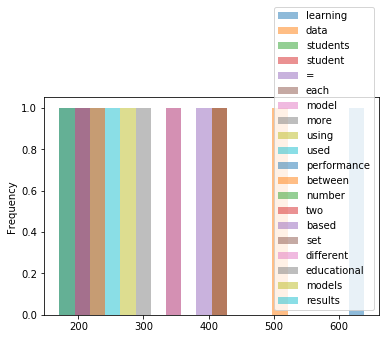

In [32]:
# 17 plot the top 20 results above as a histogram: 
top20.T.plot.hist(bins=20, alpha=0.5)

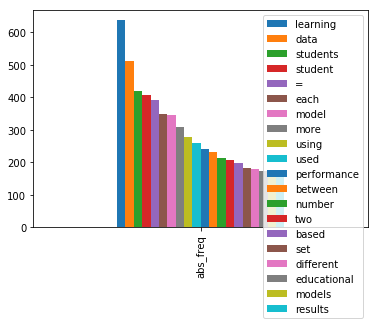

In [33]:
# 17 plot the top 20 results above as a histogram:
top20.T.plot.bar()

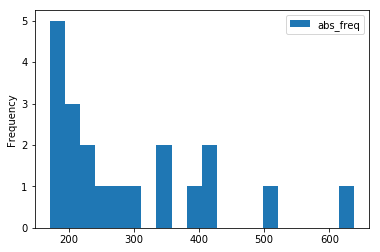

In [45]:
# 17 plot the top 20 results above as a histogram: 
top20.plot(bins=20, kind='hist')

What are improvements you could add to our data cleaning process? Write at least three things:

# Count word frequencies per paper

While the previous section gave us an overall description of the word frequency for all the papers, it would be interesting to look at each individual paper. This is what we are going to do below, by focusing on the top 30 terms used.

In [34]:
# 18) save the top 30 words from the dataframe above 
# in a new variable called "top_words"
top_words = df[:30]

#i=0
#for freq in top_words['abs_freq']:
#    print (top_words.index[i], ":",freq)
#    i=i+1

for word in top_words.T:
    print (word)


learning
data
students
student
=
each
model
more
using
used
performance
between
number
two
based
set
different
educational
models
results
features
knowledge
analysis
work
time
figure
,
table
use
mind


In [105]:
# 19) We are now going to construct a new dataframe where each row is a paper, 
# each column is one of the top 30 words used and each cell is a count of this word. 
# NOTE: make sure you add another field called "text" where you're going to store the 
# actual text of the paper. 
# Hint: build a list of dataframes (one for each papers), 
# and use the concat function from pandas to concatenate them!
d = []

for text in text_list:
    dic = {}
    dic['text'] = text
    for word in top_words:
        dic[word] = text.split().count(word)
    d.append(pd.DataFrame([dic]))

freq_df = pd.concat(d, ignore_index=True)
    
    


In [106]:
freq_df

,frequency,text
0,1,zone out no more: mitigating mind wandering d...
1,0,\n\n15\n\n measuring similarity of educational...
2,0,\n\n87\n\n generalizability of face-based mind...
3,6,\n\n95\n\n addressing student behavior and aff...
4,3,\n\n103\n\n epistemic network analysis and top...
5,2,\n\n111\n\n towards closing the loop: bridging...
6,2,\n\n119\n\n on the influence on learning of st...
7,1,\n\n127\n\n assessing computer literacy of adu...
8,0,\n\n134\n\n towards reliable and valid measure...
9,0,\n\n23\n\n adaptive sequential recommendation ...


KeyError: 'learning'

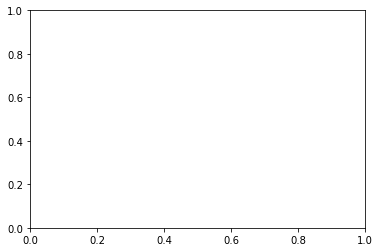

In [101]:
# 20) create a scatter plot of the words 'learning' and 'data'
# what can you say from it?
freq_df.plot(x='learning', y='data', kind='scatter')
plt.show()

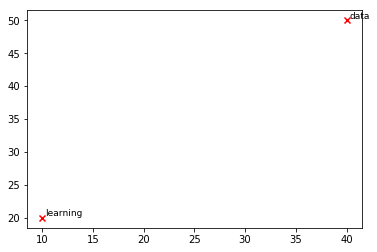

In [99]:
# 21) annotate each point with the index number of the dataframe
# hint: https://www.pythonmembers.club/2018/05/08/matplotlib-scatter-plot-annotate-set-text-at-label-each-point/
# plt.txt( ) is going to be helpful for us here

import matplotlib.pyplot as plt

# simulating a pandas df['type'] column
types = ['learning', 'data']
x_coords = [10,40]
y_coords = [20,50]

for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x+0.3, y+0.3, type, fontsize=9)
plt.show()

In [100]:
# 22) what are the two extreme papers, 
# i.e., papers with more occurences for each term on each axis?

df

,frequency
learning,638
data,512
students,421
student,407
=,393
each,350
model,345
more,310
using,278
used,258


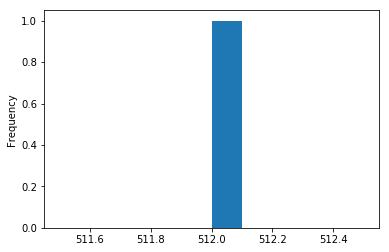

In [110]:
# 23) plot the histogram of the paper that had high counts of "data"
# hint: https://stackoverflow.com/questions/52392728/create-a-histogram-based-on-one-row-of-a-dataframe
# .loc is going to be helpful here

df.T['data'].plot.hist()

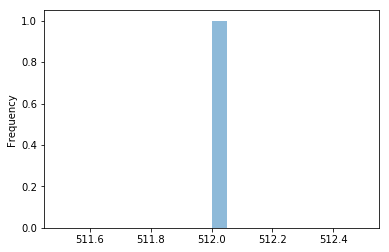

In [49]:
# 23) plot the histogram of the paper that had high counts of "data"
df.T['data'].plot.hist(bins=20, alpha=0.5)

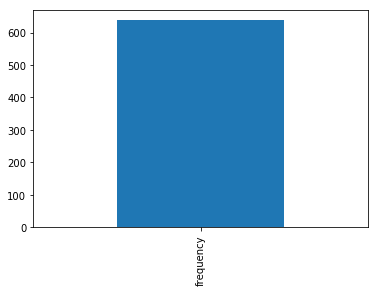

In [50]:
# 24) plot the histogram of the paper that had high counts of "learning"
# .loc is going to be helpful here
df.loc['learning'].plot.bar()

# 25) what can you observe? 
Learning occurs more frequently than data 

In [74]:
print(paper)



134

towards reliable and valid measurement of individualized
student parameters
ran liu

kenneth r. koedinger

human-computer interaction institute
carnegie mellon university

human-computer interaction institute
carnegie mellon university

ranliu@cmu.edu

koedinger@cmu.edu

abstract
research in educational data mining could benefit from greater
efforts to ensure that models yield reliable, valid, and interpretable
parameter estimates. these efforts have especially been lacking
for individualized student-parameter models. we collected two
datasets from a sizable student population with excellent “depth”
– that is, many observations for each skill for each student. we fit
two models, the individualized-slope additive factors model
(iafm) and individualized bayesian knowledge tracing (ibkt),
both of which individualize for student ability and student
learning rate. estimates of student ability were reliable and valid:
they were consistent across both models and across both datasets,


In [79]:
# 26) print the first 1000 characters of each paper. 



for p in paper:
    print(p[:1000])
# Is your interpretation confirmed?






1
3
4





t
o
w
a
r
d
s
 
r
e
l
i
a
b
l
e
 
a
n
d
 
v
a
l
i
d
 
m
e
a
s
u
r
e
m
e
n
t
 
o
f
 
i
n
d
i
v
i
d
u
a
l
i
z
e
d


s
t
u
d
e
n
t
 
p
a
r
a
m
e
t
e
r
s


r
a
n
 
l
i
u




k
e
n
n
e
t
h
 
r
.
 
k
o
e
d
i
n
g
e
r




h
u
m
a
n
-
c
o
m
p
u
t
e
r
 
i
n
t
e
r
a
c
t
i
o
n
 
i
n
s
t
i
t
u
t
e


c
a
r
n
e
g
i
e
 
m
e
l
l
o
n
 
u
n
i
v
e
r
s
i
t
y




h
u
m
a
n
-
c
o
m
p
u
t
e
r
 
i
n
t
e
r
a
c
t
i
o
n
 
i
n
s
t
i
t
u
t
e


c
a
r
n
e
g
i
e
 
m
e
l
l
o
n
 
u
n
i
v
e
r
s
i
t
y




r
a
n
l
i
u
@
c
m
u
.
e
d
u




k
o
e
d
i
n
g
e
r
@
c
m
u
.
e
d
u




a
b
s
t
r
a
c
t


r
e
s
e
a
r
c
h
 
i
n
 
e
d
u
c
a
t
i
o
n
a
l
 
d
a
t
a
 
m
i
n
i
n
g
 
c
o
u
l
d
 
b
e
n
e
f
i
t
 
f
r
o
m
 
g
r
e
a
t
e
r


e
f
f
o
r
t
s
 
t
o
 
e
n
s
u
r
e
 
t
h
a
t
 
m
o
d
e
l
s
 
y
i
e
l
d
 
r
e
l
i
a
b
l
e
,
 
v
a
l
i
d
,
 
a
n
d
 
i
n
t
e
r
p
r
e
t
a
b
l
e


p
a
r
a
m
e
t
e
r
 
e
s
t
i
m
a
t
e
s
.
 
t
h
e
s
e
 
e
f
f
o
r
t
s
 
h
a
v
e
 
e
s
p
e
c
i
a
l
l
y
 
b
e
e
n
 
l
a
c
k
i
n
g


f
o
r
 
i
n
d
i
v
i
d
u
a


v
e
 
s
t
u
d
e
n
t
 
l
e
a
r
n
i
n
g
 
t
r
a
j
e
c
t
o
r
i
e
s
,
 
e
x
a
m
i
n
i
n
g
 
t
h
e


r
e
l
a
t
i
o
n
s
h
i
p
 
b
e
t
w
e
e
n
 
e
s
t
i
m
a
t
e
d
 
s
t
u
d
e
n
t
 
a
b
i
l
i
t
y
 
a
n
d
 
s
t
u
d
e
n
t


l
e
a
r
n
i
n
g
 
r
a
t
e
,
 
a
n
d
 
t
h
e
 
r
e
l
a
t
i
o
n
s
h
i
p
 
b
e
t
w
e
e
n
 
t
h
o
s
e
 
c
o
n
s
t
r
u
c
t
s
 
a
n
d


s
e
l
f
-
r
e
p
o
r
t
e
d
 
d
a
t
a
 
o
n
 
m
o
t
i
v
a
t
i
o
n
a
l
 
a
t
t
r
i
b
u
t
e
s
.
 
f
i
n
a
l
l
y
,
 
w
e
 
p
r
o
p
o
s
e


s
o
m
e
 
u
s
e
f
u
l
 
a
p
p
l
i
c
a
t
i
o
n
s
 
o
f
 
r
e
l
i
a
b
l
e
 
a
n
d
 
v
a
l
i
d
 
i
n
d
i
v
i
d
u
a
l
i
z
e
d


s
t
u
d
e
n
t
-
p
a
r
a
m
e
t
e
r
 
m
o
d
e
l
s
,
 
i
n
c
l
u
d
i
n
g
 
a
 
n
e
w
 
w
a
y
 
t
o
 
d
e
t
e
c
t
 
w
h
e
e
l


s
p
i
n
n
i
n
g
.




2
.
 
p
r
i
o
r
 
w
o
r
k


p
r
i
o
r
 
w
o
r
k
 
o
n
 
i
n
d
i
v
i
d
u
a
l
i
z
i
n
g
 
s
t
u
d
e
n
t
 
p
a
r
a
m
e
t
e
r
s
 
h
a
s
 
f
o
c
u
s
e
d
 
o
n


v
a
r
i
a
n
t
s
 
o
f
 
b
a
y
e
s
i
a
n
 
k
n
o
w
l
e
d
g
e
 
t
r
a
c
i
n
g
 
(
b
k
t
)
 
[
3
]


e
p
r
e
s
e
n
t
e
d
 
i
n
 
o
u
r
 
d
a
t
a
 
t
o
 
a
l
l
o
w
 
f
o
r
 
t
h
e


p
o
s
s
i
b
i
l
i
t
y
 
t
h
a
t
 
m
o
d
e
l
s
 
c
o
u
l
d
 
c
a
p
t
u
r
e
 
t
h
i
s
 
v
a
r
i
a
b
i
l
i
t
y
.




3
.
1
 
d
a
t
a
 
c
o
l
l
e
c
t
i
o
n


1
9
6
 
s
t
u
d
e
n
t
s
,
 
s
p
a
n
n
i
n
g
 
1
0
 
c
l
a
s
s
e
s
 
t
a
u
g
h
t
 
b
y
 
t
h
r
e
e
 
d
i
f
f
e
r
e
n
t


t
e
a
c
h
e
r
s
,
 
e
n
r
o
l
l
e
d
 
i
n
 
h
i
g
h
 
s
c
h
o
o
l
 
g
e
o
m
e
t
r
y
 
p
a
r
t
i
c
i
p
a
t
e
d
 
i
n
 
t
w
o


s
t
u
d
i
e
s
 
c
o
n
d
u
c
t
e
d
 
a
b
o
u
t
 
a
 
m
o
n
t
h
 
a
p
a
r
t
.
 
a
 
r
a
n
g
e
 
o
f
 
s
t
u
d
e
n
t


a
b
i
l
i
t
i
e
s
 
w
e
r
e
 
i
n
c
l
u
d
e
d
 
i
n
 
t
h
e
 
s
t
u
d
y
.
 
t
w
o
 
o
f
 
t
h
e
 
1
0
 
c
l
a
s
s
e
s
 
w
e
r
e


“
h
o
n
o
r
s
”
 
a
n
d
 
t
h
r
e
e
 
o
f
 
t
h
e
 
1
0
 
c
l
a
s
s
e
s
 
w
e
r
e
 
“
i
n
c
l
u
s
i
o
n
”
.
 
h
o
n
o
r
s


c
l
a
s
s
r
o
o
m
s
 
a
r
e
 
i
n
t
e
n
d
e
d
 
f
o
r
 
s
t
u
d
e
n
t
s
 
w
h
o
 
h
a
v
e
 
s
t
r
o
n
g
 
t
h
e
o
r
e
t
i
c
a
l


i
n
t
e
r
e
s
t
s
 


s
 
f
o
r
 
e
v
e
r
y
 
s
k
i
l
l
 
i
n
 
a
 
g
i
v
e
n
 
d
a
t
a
s
e
t
.
 
b
k
t
 
m
o
d
e
l
s
 
a
r
e


u
s
u
a
l
l
y
 
f
i
t
 
u
s
i
n
g
 
t
h
e
 
e
x
p
e
c
t
a
t
i
o
n
 
m
a
x
i
m
i
z
a
t
i
o
n
 
m
e
t
h
o
d
 
(
e
m
)
,


c
o
n
j
u
g
a
t
e
 
g
r
a
d
i
e
n
t
 
s
e
a
r
c
h
,
 
o
r
 
d
i
s
c
r
e
t
i
z
e
d
 
b
r
u
t
e
-
f
o
r
c
e
 
s
e
a
r
c
h
.


i
n
d
i
v
i
d
u
a
l
i
z
e
d
 
b
a
y
e
s
i
a
n
 
k
n
o
w
l
e
d
g
e
 
t
r
a
c
i
n
g
 
(
i
b
k
t
 
[
1
8
]
)
 
b
u
i
l
d
s


u
p
o
n
 
t
h
i
s
 
b
a
s
e
l
i
n
e
 
b
k
t
 
m
o
d
e
l
 
b
y
 
i
n
d
i
v
i
d
u
a
l
i
z
i
n
g
 
t
h
e
 
e
s
t
i
m
a
t
e
 
o
f


t
h
e
 
p
r
o
b
a
b
i
l
i
t
y
 
o
f
 
i
n
i
t
i
a
l
l
y
 
k
n
o
w
i
n
g
 
a
 
s
k
i
l
l
,
 
p
(
i
n
i
t
)
,
 
a
n
d
 
t
h
e


t
r
a
n
s
i
t
i
o
n
 
p
r
o
b
a
b
i
l
i
t
y
,
 
p
(
l
e
a
r
n
)
,
 
f
o
r
 
e
a
c
h
 
s
t
u
d
e
n
t
.
 
t
o
 
a
c
c
o
m
p
l
i
s
h


t
h
e
 
s
t
u
d
e
n
t
-
l
e
v
e
l
 
i
n
d
i
v
i
d
u
a
l
i
z
a
t
i
o
n
 
o
f
 
t
h
e
s
e
 
p
a
r
a
m
e
t
e
r
s
,
 
e
a
c
h
 
o
f


t
h
e
m
 
i


u
r
e
 
2
.
 
r
e
l
a
t
i
o
n
s
h
i
p
s
 
b
e
t
w
e
e
n
 
i
a
f
m
 
s
t
u
d
e
n
t
 
i
n
t
e
r
c
e
p
t
 
a
n
d


i
b
k
t
 
s
t
u
d
e
n
t
 
p
(
i
n
i
t
)
 
p
a
r
a
m
e
t
e
r
 
e
s
t
i
m
a
t
e
s
 
(
t
o
p
 
r
o
w
)
,
 
a
n
d


b
e
t
w
e
e
n
 
i
a
f
m
 
s
t
u
d
e
n
t
 
s
l
o
p
e
 
a
n
d
 
i
b
k
t
 
s
t
u
d
e
n
t
 
p
(
l
e
a
r
n
)


p
a
r
a
m
e
t
e
r
 
e
s
t
i
m
a
t
e
s
 
(
b
o
t
t
o
m
 
r
o
w
)
,
 
f
o
r
 
t
h
e
 
t
w
o
 
d
a
t
a
s
e
t
s
.




4
.
3
 
v
a
l
i
d
i
t
y
 
o
f
 
s
t
u
d
e
n
t
 
p
a
r
a
m
e
t
e
r
s




t
o
 
a
s
s
e
s
s
 
t
h
e
 
v
a
l
i
d
i
t
y
 
o
f
 
s
t
u
d
e
n
t
 
p
a
r
a
m
e
t
e
r
 
e
s
t
i
m
a
t
e
s
,
 
w
e
 
r
e
l
a
t
e
d


t
h
e
m
 
t
o
 
o
u
t
-
o
f
-
t
u
t
o
r
 
a
s
s
e
s
s
m
e
n
t
s
 
o
f
 
t
h
e
 
r
e
l
e
v
a
n
t
 
s
t
u
d
e
n
t


c
o
n
s
t
r
u
c
t
s
.
 
i
n
 
t
h
i
s
 
c
a
s
e
,
 
w
e
 
v
a
l
i
d
a
t
e
d
 
p
a
r
a
m
e
t
e
r
 
e
s
t
i
m
a
t
e
s
 
u
s
i
n
g


p
r
e
t
e
s
t
 
a
n
d
 
p
o
s
t
t
e
s
t
 
a
s
s
e
s
s
m
e
n
t
 
d
a
t
a
 
c
o
l
l
e
c
t
e
d
 
i
n
 
t
h
e
 


m
a
y
 
a
l
s
o
 
b
e
 
d
u
e
 
t
o
 
t
h
e
 
f
a
c
t
 
t
h
a
t
 
s
t
u
d
e
n
t
s


g
e
n
u
i
n
e
l
y
 
l
e
a
r
n
 
d
i
f
f
e
r
e
n
t
 
m
a
t
e
r
i
a
l
 
a
t
 
d
i
f
f
e
r
e
n
t
 
r
a
t
e
s
.
 
u
n
f
o
r
t
u
n
a
t
e
l
y
,


w
e
 
c
a
n
n
o
t
 
r
e
s
o
l
v
e
 
t
h
i
s
 
q
u
e
s
t
i
o
n
 
w
i
t
h
 
t
h
e
 
p
r
e
s
e
n
t
 
d
a
t
a
.
 
w
e
 
a
r
e


c
u
r
r
e
n
t
l
y
 
c
o
l
l
e
c
t
i
n
g
 
m
o
r
e
 
d
a
t
a
s
e
t
s
 
f
r
o
m
 
t
h
i
s
 
s
a
m
e
 
g
r
o
u
p
 
o
f


s
t
u
d
e
n
t
s
.
 
i
f
 
w
e
 
o
b
t
a
i
n
 
m
o
r
e
 
r
e
l
i
a
b
l
e
 
a
n
d
 
v
a
l
i
d
 
s
t
u
d
e
n
t
 
l
e
a
r
n
i
n
g
 
r
a
t
e


e
s
t
i
m
a
t
e
s
 
i
n
 
f
u
t
u
r
e
 
d
a
t
a
 
f
r
o
m
 
t
h
i
s
 
g
r
o
u
p
 
o
f
 
s
t
u
d
e
n
t
s
,
 
w
e
 
c
a
n
 
m
o
r
e


c
o
n
f
i
d
e
n
t
l
y
 
a
d
d
r
e
s
s
 
t
h
i
s
 
q
u
e
s
t
i
o
n
 
i
n
 
f
u
t
u
r
e
 
r
e
s
e
a
r
c
h
.




4
.
4
.
2
 
u
n
d
e
r
s
t
a
n
d
i
n
g
 
s
t
u
d
e
n
t
 
l
e
a
r
n
i
n
g
 
r
a
t
e
 
e
s
t
i
m
a
t
e
s


g
i
v
e
n
 
t
h
a
t
 
w
e
 
e
s
t
a
b
l
i
s
h
e
d


l
y
,
 
w
e
 
i
n
v
e
s
t
i
g
a
t
e
d
 
t
h
e
 
d
e
g
r
e
e
 
o
f
 
v
a
r
i
a
b
i
l
i
t
y
 
i
n
 
e
s
t
i
m
a
t
e
d


l
e
a
r
n
i
n
g
 
r
a
t
e
 
a
c
r
o
s
s
 
s
t
u
d
e
n
t
s
.
 
t
h
e
 
f
i
r
s
t
 
q
u
a
n
t
i
l
e
 
o
f
 
s
t
u
d
e
n
t
 
l
e
a
r
n
i
n
g


r
a
t
e
s
 
f
r
o
m
 
i
a
f
m
 
i
s
 
0
.
0
3
 
l
o
g
i
t
s
 
a
n
d
 
t
h
e
 
t
h
i
r
d
 
q
u
a
n
t
i
l
e
 
o
f
 
r
a
t
e
s
 
f
r
o
m


i
a
f
m
 
i
s
 
0
.
0
8
 
l
o
g
i
t
s
.
 
t
h
e
s
e
 
c
a
n
 
b
e
 
c
o
n
c
e
p
t
u
a
l
i
z
e
d
 
a
s
 
c
a
n
o
n
i
c
a
l


“
s
l
o
w
”
 
a
n
d
 
“
f
a
s
t
”
 
l
e
a
r
n
e
r
s
.
 
i
f
 
w
e
 
w
e
r
e
 
t
o
 
a
s
s
u
m
e
 
s
t
a
r
t
i
n
g
 
a
t


a
r
o
u
n
d
 
7
0
%
 
p
e
r
f
o
r
m
a
n
c
e
 
(
w
h
i
c
h
 
c
o
m
e
s
 
f
r
o
m
 
t
h
e
 
m
o
d
e
l
’
s
 
g
l
o
b
a
l


i
n
t
e
r
c
e
p
t
 
e
s
t
i
m
a
t
e
)
,
 
i
t
 
w
o
u
l
d
 
t
a
k
e
 
t
h
e
 
“
s
l
o
w
”
 
(
0
.
0
3
 
l
o
g
i
t
s
)
 
s
t
u
d
e
n
t


a
p
p
r
o
x
i
m
a
t
e
l
y
 
2
5
 
o
p
p
o
r
t
u
n
i
t
i
e
s
 
t
o
 
r
e
a
c
h
 
m
a
s
t
e
r
y
 
(
d
e
f







c
h
a
p
t
e
r
 
4
 
d
a
t
a
s
e
t
.
 
w
e
 
f
o
u
n
d
 
a
 
s
t
r
o
n
g
 
a
n
d
 
s
i
g
n
i
f
i
c
a
n
t
 
r
e
l
a
t
i
o
n
s
h
i
p


b
e
t
w
e
e
n
 
s
t
u
d
e
n
t
 
a
b
i
l
i
t
y
 
a
n
d
 
i
m
p
r
o
v
e
m
e
n
t
 
r
a
t
e
 
a
s
 
w
e
l
l
 
a
s
 
a
n


a
d
d
i
t
i
o
n
a
l
 
e
f
f
e
c
t
 
o
f
 
d
i
l
i
g
e
n
c
e
,
 
b
a
s
e
d
 
o
n
 
s
e
l
f
-
r
e
p
o
r
t
 
m
e
a
s
u
r
e
s
.


f
u
r
t
h
e
r
 
r
e
s
e
a
r
c
h
 
i
s
 
w
a
r
r
a
n
t
e
d
 
t
o
 
d
i
s
t
i
l
l
 
t
h
e
 
c
a
u
s
a
l
 
r
e
l
a
t
i
o
n
s
h
i
p
s


b
e
t
w
e
e
n
 
t
h
e
s
e
 
c
o
n
s
t
r
u
c
t
s
.


k
n
o
w
i
n
g
 
t
h
a
t
 
a
 
m
o
d
e
l
’
s
 
e
s
t
i
m
a
t
e
s
 
o
f
 
i
n
d
i
v
i
d
u
a
l
i
z
e
d
 
s
t
u
d
e
n
t


p
a
r
a
m
e
t
e
r
s
 
n
o
t
 
o
n
l
y
 
f
i
t
 
d
a
t
a
 
w
e
l
l
,
 
b
u
t
 
a
r
e
 
r
e
l
i
a
b
l
e
 
a
n
d
 
v
a
l
i
d
,


p
r
o
v
i
d
e
s
 
g
r
e
a
t
e
r
 
c
o
n
f
i
d
e
n
c
e
 
f
o
r
 
a
p
p
l
y
i
n
g
 
t
h
e
 
m
o
d
e
l
 
t
o
 
(
1
)
 
i
n
t
e
r
p
r
e
t


t
h
e
 
p
a
r
a
m
e
t
e
r
 
e
s
t
i
m
a
t
e
s
 
t
o
 


s
o
c
i
e
t
y
.


[
1
0
]
 
l
i
u
,
 
r
.
,
 
&
 
k
o
e
d
i
n
g
e
r
,
 
k
.
 
r
.
 
(
u
n
d
e
r
 
r
e
v
i
e
w
)
.
 
c
l
o
s
i
n
g
 
t
h
e


l
o
o
p
:
 
a
u
t
o
m
a
t
e
d
 
d
a
t
a
-
d
r
i
v
e
n
 
s
k
i
l
l
 
m
o
d
e
l
 
d
i
s
c
o
v
e
r
i
e
s
 
l
e
a
d
 
t
o


i
m
p
r
o
v
e
d
 
i
n
s
t
r
u
c
t
i
o
n
 
a
n
d
 
l
e
a
r
n
i
n
g
 
g
a
i
n
s
.


[
1
1
]
 
l
i
u
,
 
r
.
,
 
k
o
e
d
i
n
g
e
r
,
 
k
.
 
r
.
,
 
&
 
m
c
l
a
u
g
h
l
i
n
,
 
e
.
 
a
.
 
(
2
0
1
4
)
.


i
n
t
e
r
p
r
e
t
i
n
g
 
m
o
d
e
l
 
d
i
s
c
o
v
e
r
y
 
a
n
d
 
t
e
s
t
i
n
g
 
g
e
n
e
r
a
l
i
z
a
t
i
o
n
 
t
o
 
a


n
e
w
 
d
a
t
a
s
e
t
.
 
i
n
 
j
.
 
s
t
a
m
p
e
r
,
 
z
.
 
p
a
r
d
o
s
,
 
m
.
 
m
a
v
r
i
k
i
s
,
 
&
 
b
.
 
m
.


m
c
l
a
r
e
n
 
(
e
d
s
.
)
,
 
p
r
o
c
e
e
d
i
n
g
s
 
o
f
 
t
h
e
 
7
t
h
 
i
n
t
e
r
n
a
t
i
o
n
a
l


c
o
n
f
e
r
e
n
c
e
 
o
n
 
e
d
u
c
a
t
i
o
n
a
l
 
d
a
t
a
 
m
i
n
i
n
g
 
(
e
d
m
2
0
1
4
)
,
 
4
–
7


j
u
l
y
,
 
l
o
n
d
o
n
,
 
u
k
 
(
p
p
.
 
1
0
7
–
1
1
3
)
.
 
i
n
t
e
r
n
a
t
i
o


# Regex

In this section we are going to work with Regex formulas to extract part of the paper. 

In [52]:
# 27) we are going to work on the first paper to make sure that our 
# regex works. Just retrieve the text and assign it to a variable below
fp = papers[0]
print(fp)

zone out no more: mitigating mind wandering during
computerized reading
sidney k. d’mello, caitlin mills, robert bixler, & nigel bosch
university of notre dame
118 haggar hall
notre dame, in 46556, usa
sdmello@nd.edu

abstract
mind wandering, defined as shifts in attention from task-related
processing to task-unrelated thoughts, is a ubiquitous
phenomenon that has a negative influence on performance and
productivity in many contexts, including learning. we propose
that next-generation learning technologies should have some
mechanism to detect and respond to mind wandering in real-time.
towards this end, we developed a technology that automatically
detects mind wandering from eye-gaze during learning from
instructional texts. when mind wandering is detected, the
technology intervenes by posing just-in-time questions and
encouraging re-reading as needed. after multiple rounds of
iterative refinement, we summatively compared the technology to
a yoked-control in an experiment with 104 par

In [80]:
# 28) find the text between the words 'abstract' and 
# 'introduction' for the first paper using a regex
# https://stackoverflow.com/questions/12736074/regex-matching-between-two-strings/12736203

import re
text_between = fp[fp.find("abstract")+1:fp("introduction")]

TypeError: 'str' object is not callable

In [117]:
# 28) find the text between the words 'abstract' and 
# 'introduction' for the first paper using a regex
# https://stackoverflow.com/questions/12736074/regex-matching-between-two-strings/12736203

import re
string = '''
re.findall('abstract(.*)introduction', string, re.DOTALL)



SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-117-5edd0397447e>, line 7)

In [53]:
# 28) find the text between the words 'abstract' and 
# 'introduction' for the first paper using a regex
# https://stackoverflow.com/questions/12736074/regex-matching-between-two-strings/12736203

import re
text_between = fp[fp.find("abstract")+1:fp("introduction")]

m = re.findall ( '<!--(.*?)-->', string, re.MULTILINE)
m
[' two -- -- ', ' three ']
m = re.findall ( '<!--(.*?)-->', string, re.DOTALL)
m
[' one \n', ' two -- -- ', ' three ']

TypeError: 'str' object is not callable

In [ ]:
# 28) find the text between the words 'abstract' and 
# 'introduction' for the first paper using a regex
# https://stackoverflow.com/questions/12736074/regex-matching-between-two-strings/12736203

import re
text_between = fp[first_paper.find('abstract')+1:fp('introduction')]

In [ ]:
# 28) find the text between the words 'abstract' and 
# 'introduction' for the first paper using a regex
# https://stackoverflow.com/questions/12736074/regex-matching-between-two-strings/12736203
abstract(?s)(.*)introduction

In [ ]:
# 29) find the text between the words 'abstract' and 
# 'introduction' for the first paper using the .index() function
fp_list = fp.split() 
fp_list.index("abstract")
fp_list.index("introduction")

In [ ]:
# 30) add a new column namd "abstract" to the dataframe above 
# and initialize it with an empty string
import pandas as pd
fpd = pd.DataFrame(fp_list) 
fpd.head()
fpd['abstract'] = 'empty'
fpd

In [ ]:
# now add the abstracts to each row of the dataframe using either
# of the two methods above
# Hint: https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas

for index, row in fpd.iterrows():
    print row["c1"], row["c2"]

In [ ]:
# now add the abstracts to each row of the dataframe using either
# of the two methods above
# Hint: https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas

for row in fpd.itertuples(index=True, name='Pandas'):
    print getattr(row, "c1"), getattr(row, "c2")

In [ ]:
# 31) print your abstracts (they should contain a lot of \n = carriage return)
print(df.loc['abstract'])

In [ ]:
# 32) clean the abstract column using the "apply" function with a lambda
# Hint: https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.apply.html

def valuation_formula(x, y):
    return x * y * 0.5

fpd['abstract'] = fpd.apply(lambda row: valuation_formula(row['x'], row['y']), axis=1)

## Comparing documents using TF-IDF (optional)

In [ ]:
# 33) now we are going to do something a little more advanced:'
# we are going to compute the similarity between two texts
# using a method called tf-idf (we'll talk more about it later)
# Hint: https://stackoverflow.com/questions/43631533/similarity-between-two-text-documents-in-python
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


34) What can you observe?

In [ ]:
# 35) repeat the same procedure with the entire papers
# Use the same logic as the previous cell, but use the text_list variable that we defined previously


In [ ]:
# 36) What are two documents that seem to be very similar?
# print their abstract: 
# print the first 1000 characters of each paper. 


In [ ]:
# 37) what seems to be similar between them? 

# they both talk about analyzing questions and answers from students

## Free exploration (Optional)

- try to extract the names of the author
- find a way to get the top words shared across two texts
- use a regex (or any other method) to get the list of references